### Data Dictionary

User data for the preceding month:

    'gender' - 0 for male, 1 for female

    'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

    'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

    'Promo_friends' — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

    'Phone' — whether the user provided their phone number

    'Age' - current age of the member in years

    'Lifetime' — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status:

    'Contract_period' — 1 month, 3 months, 6 months, or 1 year

    'Month_to_end_contract' — the months remaining until the contract expires

    'Group_visits' — whether the user takes part in group sessions

    'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

    'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

    'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

    'Churn' — 1 if member churned, 0 if member is still active

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, classification_report, confusion_matrix

C:\Users\svkar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
gym_data=pd.read_csv('gym_churn_us.csv') #Reading in file

In [3]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [5]:
gym_data.isnull().mean()*100 #finding % of nulls in df

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

No nulls within the dataframe.

In [6]:
duplicates = gym_data[gym_data.duplicated()]#finding duplicate records
print(duplicates)

Empty DataFrame
Columns: [gender, Near_Location, Partner, Promo_friends, Phone, Contract_period, Group_visits, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month, Churn]
Index: []


No duplicate records.

In [7]:
percent_churn=gym_data['Churn'].mean()*100
print(f"Churn rate is: {percent_churn}% across all customers")

Churn rate is: 26.525% across all customers


## EDA

### *Filter by Churn*

In [8]:
churn_data=gym_data[gym_data['Churn']==1] #filtering out only for churned values

#### Gender

In [9]:
churn_data['Gender_label'] = churn_data['gender'].map({0: 'Male', 1: 'Female'}) #renaming values

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\957955902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Gender_label'] = churn_data['gender'].map({0: 'Male', 1: 'Female'}) #renaming values


C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\446309260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_data, x='Gender_label', palette='pastel')


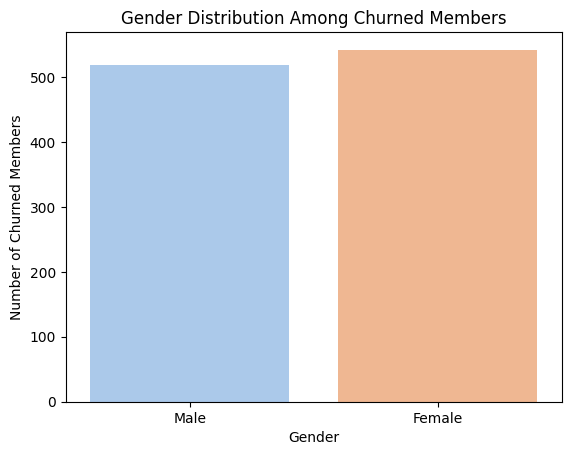

In [10]:
sns.countplot(data=churn_data, x='Gender_label', palette='pastel')
plt.title('Gender Distribution Among Churned Members')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Members')
plt.show()

#### Location

In [11]:
churn_data['Near_Location_Label'] = churn_data['Near_Location'].map({0: 'No', 1: 'Yes'})

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\2493233104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Near_Location_Label'] = churn_data['Near_Location'].map({0: 'No', 1: 'Yes'})


C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\842979612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_data, x='Near_Location_Label', palette='pastel')


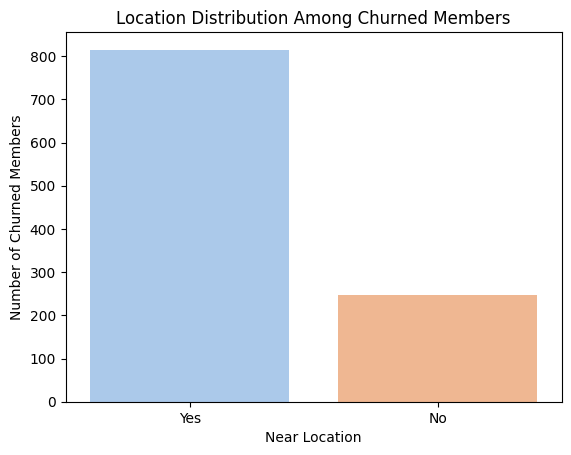

In [12]:
sns.countplot(data=churn_data, x='Near_Location_Label', palette='pastel')
plt.title('Location Distribution Among Churned Members')
plt.xlabel('Near Location')
plt.ylabel('Number of Churned Members')
plt.show()

#### Partnership

In [13]:
churn_data['Partner_Label'] = churn_data['Partner'].map({0: 'No', 1: 'Yes'})

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\3550378751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Partner_Label'] = churn_data['Partner'].map({0: 'No', 1: 'Yes'})


C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\1140645245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_data, x='Partner_Label', palette='pastel')


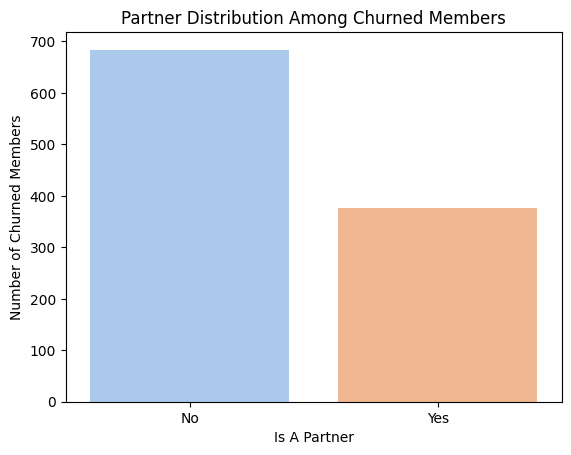

In [14]:
sns.countplot(data=churn_data, x='Partner_Label', palette='pastel')
plt.title('Partner Distribution Among Churned Members')
plt.xlabel('Is A Partner')
plt.ylabel('Number of Churned Members')
plt.show()

In [15]:
churn_data['Promo_Friends_Label'] = churn_data['Promo_friends'].map({0: 'No', 1: 'Yes'})

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\1069169315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Promo_Friends_Label'] = churn_data['Promo_friends'].map({0: 'No', 1: 'Yes'})


C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\1086784374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_data, x='Promo_Friends_Label', palette='pastel')


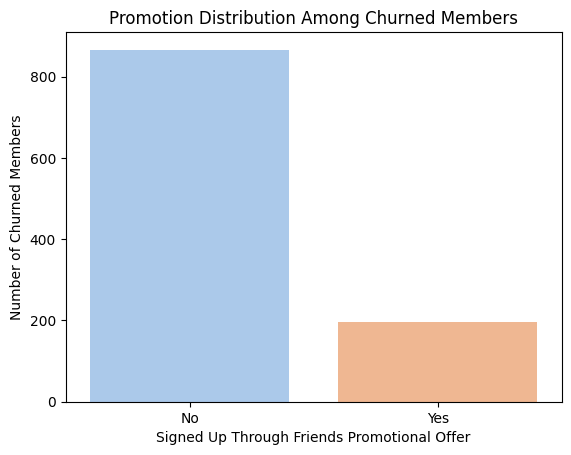

In [16]:
sns.countplot(data=churn_data, x='Promo_Friends_Label', palette='pastel')
plt.title('Promotion Distribution Among Churned Members')
plt.xlabel('Signed Up Through Friends Promotional Offer')
plt.ylabel('Number of Churned Members')
plt.show()

#### Age

In [17]:
churn_data['Age'].unique()

array([30, 27, 32, 29, 25, 26, 28, 24, 23, 31, 21, 22, 34, 19, 33, 20, 35,
       18, 38], dtype=int64)

In [18]:
bins = [10, 15, 20, 25, 30, 40]
labels = ['10-15', '16-20', '21-25', '26-30','30-40']

In [19]:
churn_data['Age_Group'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=True) #split into age groups

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\1806729568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['Age_Group'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right=True) #split into age groups


In [20]:
churn_counts = churn_data['Age_Group'].value_counts().sort_index() #count number in each age group

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\1135352211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')


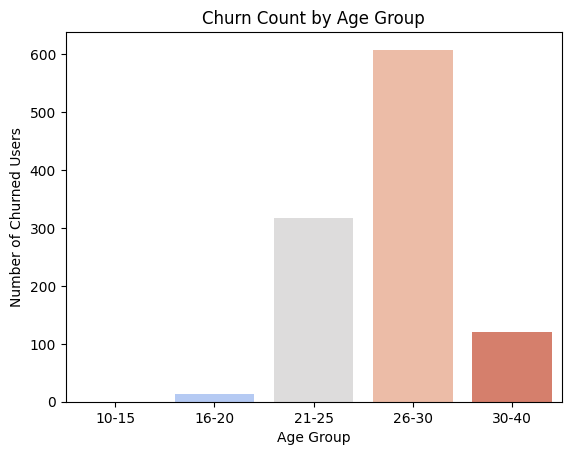

In [21]:
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')
plt.title('Churn Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Churned Users')
plt.show()

#### Lifetime

In [22]:
churn_data['Lifetime'].unique()

array([0, 2, 1, 3, 6, 5, 4, 8, 9], dtype=int64)

In [23]:
churn_counts = churn_data['Lifetime'].value_counts().sort_index() #count number in each age group

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\15738410.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')


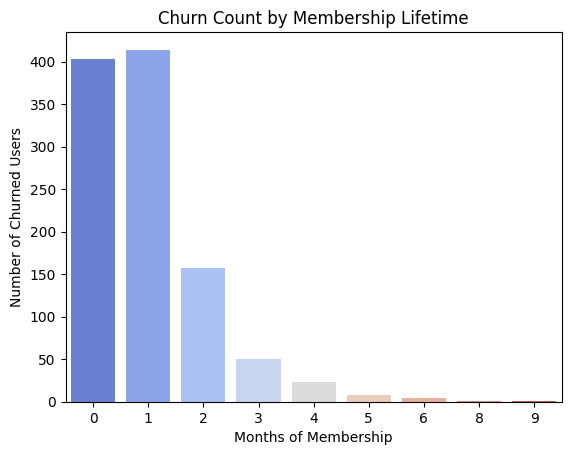

In [24]:
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')
plt.title('Churn Count by Membership Lifetime')
plt.xlabel('Months of Membership')
plt.ylabel('Number of Churned Users')
plt.show()

In [25]:
churn_data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn', 'Gender_label', 'Near_Location_Label', 'Partner_Label',
       'Promo_Friends_Label', 'Age_Group'],
      dtype='object')

#### Contract

In [26]:
grouped_contract=churn_data.groupby(['Contract_period', 'Month_to_end_contract','Churn']).size().reset_index(name='Count')

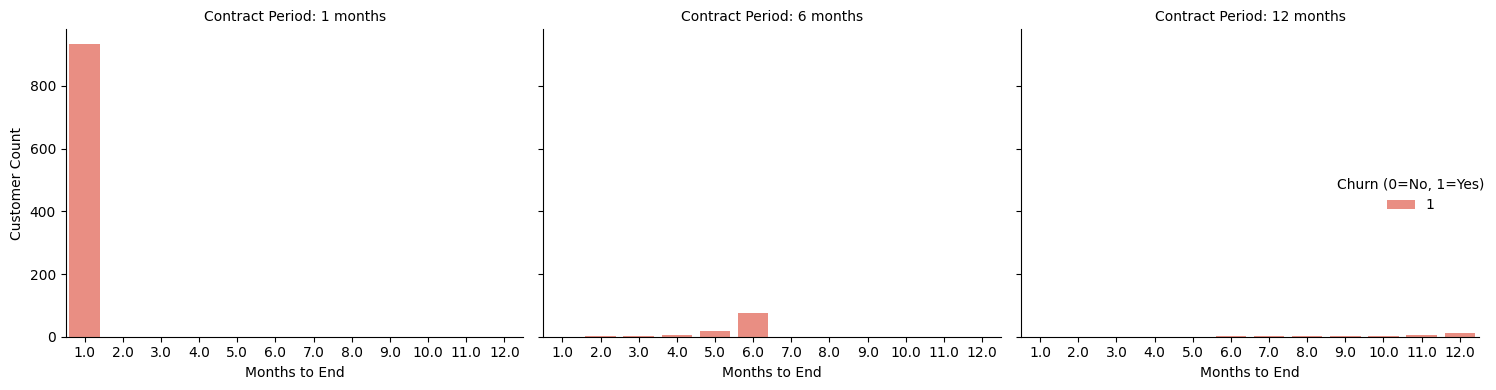

In [27]:
g = sns.catplot(
    data=grouped_contract,
    x='Month_to_end_contract',
    y='Count',
    hue='Churn',
    col='Contract_period',
    kind='bar',
    palette={0: "skyblue", 1: "salmon"},
    height=4,
    aspect=1.2
)
g.set_titles("Contract Period: {col_name} months")
g.set_axis_labels("Months to End", "Customer Count")
g._legend.set_title('Churn (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

Majority of members cancelling after first billing cycle and not renewing. Few customers churned with 4-5 months remaining in 6 month contract, but majority also for a 6 month contract, do not renew after the contract. Not many individuals opt for 12 month contract, but if they do, do not renew after the 12 month contract is complete. 

Dissecting more into the 1 month, since majority of customers fall into this category.

In [28]:
churn_one_month = churn_data[(churn_data['Contract_period'] == 1)]

In [29]:
churn_one_month.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Gender_label,Near_Location_Label,Partner_Label,Promo_Friends_Label,Age_Group
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,Male,Yes,No,No,26-30
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1,Female,Yes,Yes,No,26-30
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1,Female,Yes,No,No,26-30
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1,Male,No,No,No,26-30
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1,Female,Yes,No,No,30-40


In [30]:
#group by Promo_friends to see how many signed for promotional reasons
promo_counts = churn_one_month['Promo_friends'].value_counts().reset_index()
promo_counts.columns = ['Promo_friends', 'Count']

In [31]:
color_label_map = {0: 'No Promo', 1: 'Used Promo'}
promo_counts['Promo_friends'] = promo_counts['Promo_friends'].map(color_label_map)

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\980241425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promo_counts, x='Promo_friends', y='Count', palette='Set2')


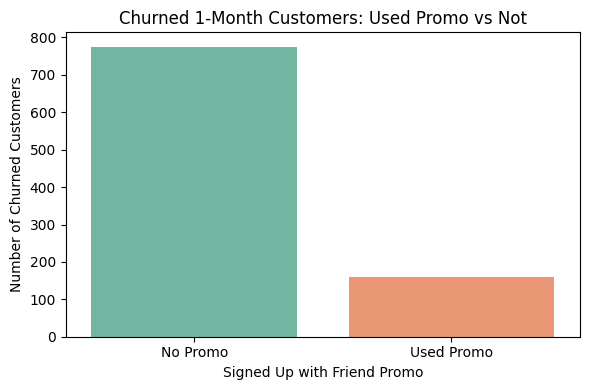

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(data=promo_counts, x='Promo_friends', y='Count', palette='Set2')
plt.title('Churned 1-Month Customers: Used Promo vs Not')
plt.xlabel('Signed Up with Friend Promo')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()
plt.show()

In [33]:
group_class_counts = churn_one_month['Group_visits'].value_counts().reset_index()
group_class_counts.columns = ['Group_visits', 'Count']

In [34]:
color_label_map = {0: 'No Group Visits', 1: 'Had Group Visits'}
group_class_counts['Group_visits'] = group_class_counts['Group_visits'].map(color_label_map)

C:\Users\svkar\AppData\Local\Temp\ipykernel_42876\3830068575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_class_counts, x='Group_visits', y='Count', palette='Set3')


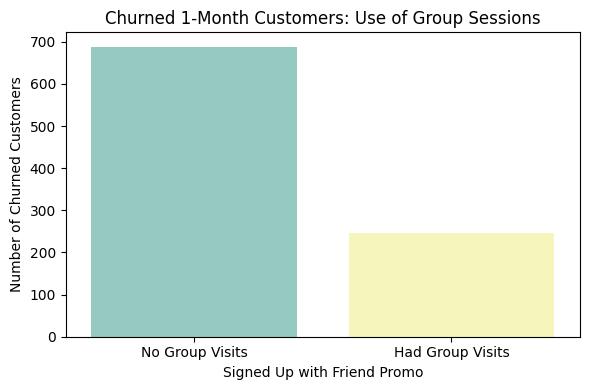

In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(data=group_class_counts, x='Group_visits', y='Count', palette='Set3')
plt.title('Churned 1-Month Customers: Use of Group Sessions')
plt.xlabel('Signed Up with Friend Promo')
plt.ylabel('Number of Churned Customers')
plt.tight_layout()
plt.show()

Churn-Prone Customer Profile based on EDA: Female, near facility, not from a partner-distribution channel, did not join for promotional offers, age 26-30, and not actively involved in group classes offered.

Location: There could be other competing gyms nearby. 

Ages 26-30/Female: Might be moving around for other opportunities, so not as committed. 

Did not sign up for promotional reasons: Organic introduction and expectations may have been higher.

Minimal group session participation: Not encouraged to join during onboarding. 

## Feature Engineering

In [36]:
churn_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Gender_label,Near_Location_Label,Partner_Label,Promo_Friends_Label,Age_Group
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,Male,Yes,No,No,26-30
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1,Female,Yes,Yes,No,26-30
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1,Female,Yes,No,No,26-30
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1,Male,No,No,No,26-30
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1,Female,Yes,No,No,30-40


In [37]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [38]:
#Behavior changes
gym_data['class_freq'] = gym_data['Avg_class_frequency_total'] - gym_data['Avg_class_frequency_current_month'] #change in use of gym 
gym_data['drop_visit'] = (gym_data['class_freq'] > 0).astype(int) #early churn flag of customers who reduced gym frequency
gym_data['low_engage_recent_freq_flag'] = (gym_data['Avg_class_frequency_current_month'] < 1).astype(int) #reduction of engagement with gym in the past month
gym_data['no_recent_visit'] = (gym_data['Avg_class_frequency_current_month'] == 0).astype(int) #no visits in past month

In [39]:
#Gym Committment
gym_data['high_spender_flag'] = (gym_data['Avg_additional_charges_total'] > gym_data['Avg_additional_charges_total'].median()).astype(int) #median used due to mean sensitivity to outliers (those spending less on extras versus those spending more)
gym_data['low_lifetime_flag'] = (gym_data['Lifetime'] < 3).astype(int) #not as committed to the gym 

In [40]:
#low incentive and engagement
gym_data['no_group_low_freq'] = ((gym_data['Group_visits'] == 0) & (gym_data['low_engage_recent_freq_flag'] == 1)).astype(int) #minimum engagement, not using classes or gym facility in general
gym_data['no_promo_no_partner'] = ((gym_data['Promo_friends'] == 0) & (gym_data['Partner'] == 0)).astype(int) #did not sign up on incentive

In [41]:
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,...,Avg_class_frequency_current_month,Churn,class_freq,drop_visit,low_engage_recent_freq_flag,no_recent_visit,high_spender_flag,low_lifetime_flag,no_group_low_freq,no_promo_no_partner
0,1,1,1,1,0,6,1,29,14.227470,5.0,...,0.000000,0,0.020398,1,1,1,0,0,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,...,1.910244,0,0.012693,1,0,0,0,0,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,...,1.736502,0,0.122596,1,0,0,0,1,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,...,3.357215,0,-0.151582,0,0,0,0,1,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,...,1.120078,0,-0.006194,0,0,0,1,0,0,0


## Model Training

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
X = gym_data.drop('Churn', axis=1)
X = pd.get_dummies(X) #encoding categorical variables
y = gym_data['Churn']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #train test split while also maintaining ratio of churn/non-churn in both sets

In [45]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) #do not automatically encode and compare predicted churn probability to actual label 

In [46]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [47]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,scoring='f1')

In [48]:
#pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
#pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
grid_search.fit(X_train, y_train)

C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\svkar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:33:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

In [51]:
best_model = grid_search.best_estimator_

In [52]:
y_pred = best_model.predict(X_test)

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       588
           1       0.95      0.91      0.93       212

    accuracy                           0.96       800
   macro avg       0.96      0.94      0.95       800
weighted avg       0.96      0.96      0.96       800



Improved F1-Score for Class 0 and Class 1. 

In [ ]:
#pip install shap

## Model Evaluation

In [54]:
import shap

In [55]:
explainer = shap.TreeExplainer(best_model)

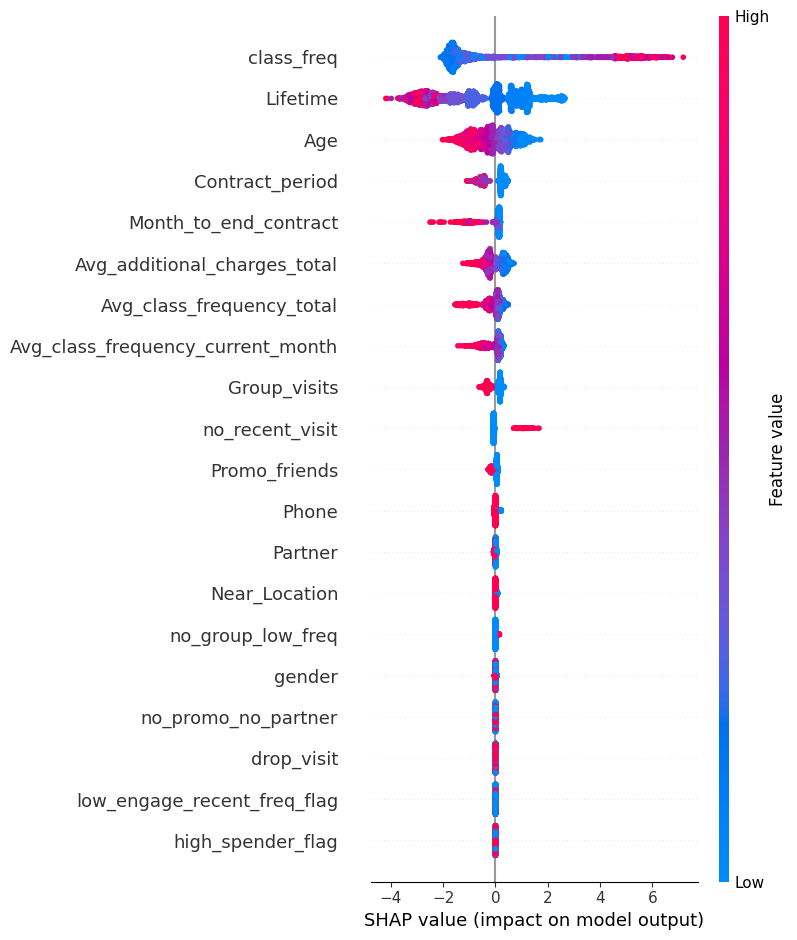

In [56]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)